<a href="https://colab.research.google.com/github/svhenrique/analise-dataset-heart-disease/blob/master/semana3/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados sobre mortalidade da insuficiênia cardíaca**


*   O dataset contém 12 recursos que podem ser usados para prever a morte por insuficiência cardíaca.
* [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)   
* Atributos numéricos descrevem:
  * age
    * idade
  * anaemia
    * anemia
  * creatinine_phosphokinase
    * creatinina fosfoquinase 
  * diabetes
    * diabetes
  * ejection_fraction
    * fração de ejeção
  * high_blood_pressure
    * hipertensão arterial
  * platelets
    * plaquetas
  * serum_creatinine
    * creatinina sérica
  * serum_sodium
    * sódio sérico
  * sex
    * sexo
  * smoking
    * fumante
  * time
    * tempo
  * DEATH_EVENT
    * morte

* 298 instâncias
* Problema de classificação binária 

* Mais detalhes sobre a  organização e análise preliminar dos dados desse dataset
[estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/Untitled0.ipynb).

* Mais detalhes sobre os testes feitos com Arvore de Decisão e Random Forest [estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/semana2/Untitled1.ipynb).




##**1. Importando bibliotecas e métodos necessários**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import RandomOverSampler 

##**2. Lendos os dados do dataset**

In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('https://raw.githubusercontent.com/svhenrique/analise-dataset-heart-disease/master/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **3. Limpeza e organização dos dados para modelagem**


In [ ]:
# excluindo colunas irrelevantes

dados = dados.drop(columns=['time'])
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [ ]:
# verificando se existem valores NAN, ? ou dados faltantes
dados.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
DEATH_EVENT                 False
dtype: bool

## **4. Re-escala dos dados**

In [ ]:
# Reescala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1.0


# **Sem balanceamento**


## **5a. Organizando dados para modelagem**


### **Dividindo os dados em atributos descritores e atributos de classe**

In [ ]:
# X recebe os atributos descritores
tam = len(dados.columns)
X = dados.iloc[:,0:(tam-1)]
print("Coluna apagada: ", set(dados.columns) -set(X.columns))
X.head()

Coluna apagada:  {'DEATH_EVENT'}


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [ ]:
# y recebe o atributo de classe (target)
y = dados.DEATH_EVENT
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 299, dtype: float64

### **Dividindo os dados em treino e teste**

In [ ]:
# 20% dos dados serão para teste 
# X_train e y_train serão para treino
# X_test e y_test serão para teste

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## **6a. Definindo algoritmo de aprendizado**


### **Rede Neural Multi-Layer Perceptron (MLP)**

In [ ]:
# definindo modelo
rede = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1000)

In [ ]:
# treinando modelo
rede.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# realizando classificação
rede = rede.predict(X_test)
rede

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0.])

## **7a. Avaliando classificador**

In [ ]:
# calculando acurácia
acuracia = accuracy_score(y_test,rede)
acuracia

0.7666666666666667

In [ ]:
# calculando precisão
precisao = precision_score(y_test, rede)
precisao

0.5333333333333333

In [ ]:
# calculando recall
recall = recall_score(y_test, rede)
recall

0.5333333333333333

In [ ]:
# calculando f1-score
f1 = f1_score(y_test,rede)
f1

0.5333333333333333

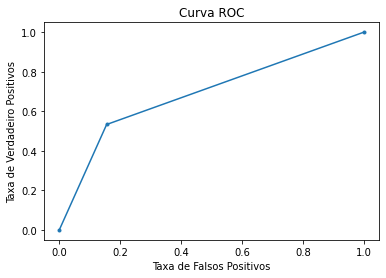

Área sobre a curva: 0.6888888888888888


In [ ]:
fpr, tpr, _ = roc_curve(y_test,rede)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f"Área sobre a curva: {roc_auc_score(y_test,rede)}")

### **Validação cruzada**

In [ ]:
# definindo modelo
rede = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1000)

In [ ]:
# calculando os scores
scores = cross_val_score(rede,X,y,cv=10)
scores

array([0.7       , 0.66666667, 0.76666667, 0.66666667, 0.83333333,
       0.63333333, 0.73333333, 0.83333333, 0.83333333, 0.75862069])

In [ ]:
scores.mean(), scores.std()

(0.7425287356321839, 0.07134774507052186)

## **8a. Comparando MLP com Árvore de Decisão e Random Forest**

In [ ]:
# criando árvore
arvore = DecisionTreeClassifier()

# calculando os scores com cross validati
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [ ]:
#criando random forest
floresta = RandomForestClassifier()

#calculando os scores com cross validation
scores_floresta = cross_val_score(floresta,X,y,cv=10)

In [ ]:
#criando rede neural
rede = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores com cross validation
scores_rede = cross_val_score(rede,X,y,cv=10)

In [ ]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('MLP:', round(scores_rede.mean(),3),round(scores_rede.std(),3))

Árvore de Decisão:  0.692 0.067
Random Forest:  0.743 0.071
MLP: 0.736 0.07


# **Com balanceamento**

## **5b. Organizando dados para modelagem**



---


Para balancear os meus dados, eu usarei uma estratégia baseada no *Under-Sampling*, que é uma técnica para balancear os dados e consiste em reduzir o número de instâncias da classe majoritária. Seguirei esses passos:


1.   Separar as classes em dois dataframes diferentes.

2.   Tirar da classe majoritária um valor X, tal que X é igual a diferença entre o número de instâncias das duas classes.

3. Guardar as instâncias que foram "removidas" em outro dataframe.

4. Juntar os dataframes, que antes foram separados, em um.

5.   Treinar e testar os classificadores com o dataframe, que agora está balanceado.
6.   Testar os classificadores com o dataframe extra formado pelas instâncias removidas.

Se os testes feitos tiverem um bom resultado, significa que o desbalanceamento das instâncias era o motivo das métricas de avaliação estarem baixas.








---

### **Balanceando e organizando dados**

In [ ]:
# separando dataframe em duas classes baseado na coluna DEATH_EVENT
class_0 = dados[dados['DEATH_EVENT'] == 0]
class_1 = dados[dados['DEATH_EVENT'] == 1]

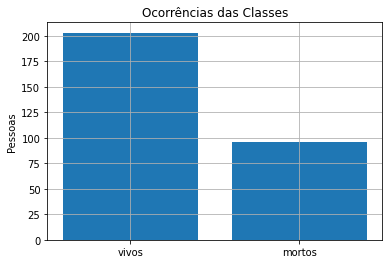

In [ ]:
# gráfico de barras que mostra as classes desbalanceadas
plt.bar(['vivos', 'mortos'], [class_0.DEATH_EVENT.count(), class_1.DEATH_EVENT.count()])
plt.ylabel('Pessoas')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()



---

Separando dataframe dae class_0, pois tem o maior número de instâncias, em dois dataframes, sendo que, class_0a terá o mesmo número de instâncias que class_1 e será usado para treino e teste. O class_0b será usado apenas para teste, se o teste possuir uma quantidade de acertos "boa", significa que não houve grande perca de informações, então, o classificador e o método para balanço das classes foi um sucesso.


---



In [ ]:
# separando class_0
class_0a = class_0[:96]
class_0b = class_0[96:]

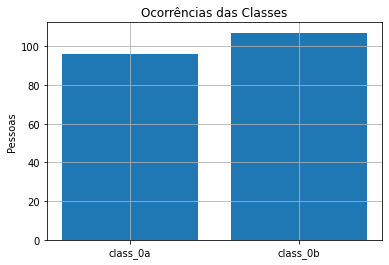

In [ ]:
# gráfico de barras que mostra as classes derivadas de class_0a
plt.bar(['class_0a', 'class_0b'], [class_0a.DEATH_EVENT.count(), class_0b.DEATH_EVENT.count()])
plt.ylabel('Pessoas')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [ ]:
# juntando os dados 
dados_balanceados = pd.concat([class_0a, class_1])
dados_balanceados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
14,0.163636,1.0,0.007272,0.0,0.242424,1.0,0.487211,0.056180,0.714286,0.0,0.0,0.0
20,0.454545,1.0,0.003700,0.0,0.166667,1.0,0.304158,0.089888,0.685714,0.0,0.0,0.0
23,0.236364,0.0,0.005103,1.0,0.696970,0.0,0.415687,0.033708,0.628571,1.0,0.0,0.0
33,0.181818,1.0,0.017351,1.0,0.242424,0.0,0.335677,0.078652,0.714286,0.0,0.0,0.0
38,0.363636,0.0,0.335928,1.0,0.242424,0.0,0.339314,0.202247,0.685714,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.600000,0.0,0.071319,0.0,0.090909,0.0,0.288833,0.149438,0.600000,1.0,0.0,1.0
230,0.363636,0.0,0.018244,0.0,0.242424,0.0,0.044733,0.134831,0.400000,0.0,0.0,1.0
246,0.272727,0.0,0.254402,0.0,0.166667,0.0,0.350224,0.067416,0.714286,1.0,0.0,1.0
262,0.454545,1.0,0.029982,1.0,0.166667,0.0,0.209601,0.101124,0.457143,1.0,0.0,1.0


In [ ]:
# X2 recebe os atributos descritores
tam2 = len(dados_balanceados.columns)
X2 = dados_balanceados.iloc[:,0:(tam2-1)]
X2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
14,0.163636,1.0,0.007272,0.0,0.242424,1.0,0.487211,0.056180,0.714286,0.0,0.0
20,0.454545,1.0,0.003700,0.0,0.166667,1.0,0.304158,0.089888,0.685714,0.0,0.0
23,0.236364,0.0,0.005103,1.0,0.696970,0.0,0.415687,0.033708,0.628571,1.0,0.0
33,0.181818,1.0,0.017351,1.0,0.242424,0.0,0.335677,0.078652,0.714286,0.0,0.0
38,0.363636,0.0,0.335928,1.0,0.242424,0.0,0.339314,0.202247,0.685714,1.0,0.0


In [ ]:
# y2 recebe o atributo de classe (target)
y2 = dados_balanceados.DEATH_EVENT
y2.head()

14    0.0
20    0.0
23    0.0
33    0.0
38    0.0
Name: DEATH_EVENT, dtype: float64

In [ ]:
# 20% dos dados serão para teste 
# X2_train e y2_train serão para treino
# X2_test e y2_test serão para teste

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2)

### Balanceando e organizando os dados 2

In [ ]:
# iniciando objeto para fazer OverSampling
ros = RandomOverSampler()

In [ ]:
# iniciando X
X3 = dados.iloc[:,0:(tam2-1)]
X3.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [ ]:
# iniciando y 
y3 = dados.DEATH_EVENT
y3

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 299, dtype: float64

In [ ]:
# dividndo em dados de treino e teste
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)

In [ ]:
# fazendo OverSampling nos dados de teste
X3_train, y3_train = ros.fit_resample(X3_train, y3_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


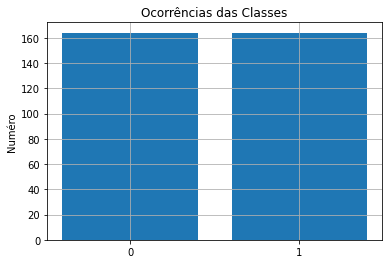

In [ ]:
# gráfico de barras que mostra as classes de y3_train
plt.bar(['0', '1'], [list(y3_train).count(0), list(y3_train).count(1)])
plt.ylabel('Numéro')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

## **6b. Definindo algoritmo de aprendizado**

### **Rede Neural Multi-Layer Perceptron (MLP)**

In [ ]:
# definindo modelo
rede2 = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1000)

In [ ]:
# treinando modelo
rede2.fit(X2_train,y2_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# realizando classificação
rede2 = rede2.predict(X2_test)
rede2

array([0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1.])

### **Arvore de Decisão**

In [ ]:
# definindo modelo
arvore2 = DecisionTreeClassifier()

In [ ]:
# treinando modelo
arvore2.fit(X2_train,y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# realizando classificação
arvore2 = arvore2.predict(X2_test)
arvore2

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0.])

### **Random Forest**

In [ ]:
# criando random forest
floresta2 = RandomForestClassifier()

In [ ]:
# treinando modelo
floresta2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# realizando classificação
floresta2 = floresta2.predict(X2_test)
floresta2

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1.])

### **Comparando**

In [ ]:
# calculando acurácia
print('Rede Neural: {}'.format(accuracy_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(accuracy_score(y2_test, arvore2)))
print('Random Forest: {}'.format(accuracy_score(y2_test, floresta2)))

Rede Neural: 0.6666666666666666
Arvore de decisão: 0.38461538461538464
Random Forest: 0.6410256410256411


In [ ]:
# calculando precisão
print('Rede Neural: {}'.format(precision_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(precision_score(y2_test, arvore2)))
print('Random Forest: {}'.format(precision_score(y2_test, floresta2)))

Rede Neural: 0.7222222222222222
Arvore de decisão: 0.42857142857142855
Random Forest: 0.6521739130434783


In [ ]:
# calculando recall_score
print('Rede Neural: {}'.format(recall_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(recall_score(y2_test, arvore2)))
print('Random Forest: {}'.format(recall_score(y2_test, floresta2)))

Rede Neural: 0.6190476190476191
Arvore de decisão: 0.42857142857142855
Random Forest: 0.7142857142857143


In [ ]:
# calculando f1-score
print('Rede Neural: {}'.format(f1_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(f1_score(y2_test, arvore2)))
print('Random Forest: {}'.format(f1_score(y2_test, floresta2)))

Rede Neural: 0.6666666666666666
Arvore de decisão: 0.42857142857142855
Random Forest: 0.6818181818181819


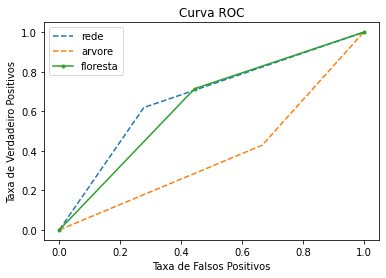

Área sobre a curva - Rede Neural: 0.6706349206349207
Área sobre a curva - Arvore: 0.380952380952381
Área sobre a curva - Floresta: 0.6349206349206349


In [ ]:
# Plotando gráfico da Curva ROC
fpr_re2, tpr_re2, _ = roc_curve(y2_test,rede2)
fpr_ar2, tpr_ar2, _ = roc_curve(y2_test,arvore2)
fpr_fl2, tpr_fl2, _ = roc_curve(y2_test,floresta2)
plt.plot(fpr_re2,tpr_re2,linestyle='--',label='rede')
plt.plot(fpr_ar2,tpr_ar2,linestyle='--',label='arvore')
plt.plot(fpr_fl2,tpr_fl2,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f"Área sobre a curva - Rede Neural: {roc_auc_score(y2_test,rede2)}")
print(f"Área sobre a curva - Arvore: {roc_auc_score(y2_test,arvore2)}")
print(f"Área sobre a curva - Floresta: {roc_auc_score(y2_test,floresta2)}")

### **Validação cruzada**

In [ ]:
# definindo os modelos
rede2_v = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1000)
arvore2_v = DecisionTreeClassifier()
floresta2_v = RandomForestClassifier()

In [ ]:
# calculando os scores
scores_re2 = cross_val_score(rede2_v, X2, y2, cv=5)
scores_ar2 = cross_val_score(arvore2_v, X2, y2, cv=5)
scores_fl2 = cross_val_score(floresta2_v, X2, y2, cv=5)

In [ ]:
# printando scores
print('Rede Neural: ', scores_re2)
print('Arvore: ', scores_ar2)
print('Random Forest: ', scores_fl2)

Rede Neural:  [0.48717949 0.69230769 0.71052632 0.71052632 0.5       ]
Arvore:  [0.58974359 0.69230769 0.55263158 0.65789474 0.63157895]
Random Forest:  [0.58974359 0.58974359 0.73684211 0.81578947 0.73684211]


In [ ]:
print('Rede Neural: ', scores_re2.mean(), scores_re2.std())
print('Arvore: ', scores_ar2.mean(), scores_ar2.std())
print('Random Forest: ', scores_fl2.mean(), scores_fl2.std())

Rede Neural:  0.6201079622132253 0.10359503889125339
Arvore:  0.6248313090418354 0.04926607808786332
Random Forest:  0.6937921727395412 0.08971304260283551


## **6b. Definindo algoritmo de aprendizado2**

### **Rede Neural Multi-Layer Perceptron (MLP)**

In [ ]:
# definindo modelo
rede3 = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1000)

In [ ]:
# treinando modelo
rede3.fit(X3_train,y3_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# realizando classificação
rede3 = rede3.predict(X3_test)
rede3

array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1.])

### **Arvore de Decisão**

In [ ]:
# definindo modelo
arvore3 = DecisionTreeClassifier()

In [ ]:
# treinando modelo
arvore3.fit(X3_train,y3_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# realizando classificação
arvore3 = arvore3.predict(X3_test)
arvore3

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1.])

### **Random Forest**

In [ ]:
# criando random forest
floresta3 = RandomForestClassifier(n_estimators=200)

In [ ]:
# treinando modelo
floresta3.fit(X3_train, y3_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# realizando classificação
floresta3 = floresta3.predict(X3_test)
floresta3

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1.])

### **Comparando**

In [ ]:
# calculando acurácia
print('Rede Neural: {}'.format(accuracy_score(y3_test, rede3)))
print('Arvore de decisão: {}'.format(accuracy_score(y3_test, arvore3)))
print('Random Forest: {}'.format(accuracy_score(y3_test, floresta3)))

Rede Neural: 0.7333333333333333
Arvore de decisão: 0.7
Random Forest: 0.8166666666666667


In [ ]:
# calculando precisão
print('Rede Neural: {}'.format(precision_score(y3_test, rede3)))
print('Arvore de decisão: {}'.format(precision_score(y3_test, arvore3)))
print('Random Forest: {}'.format(precision_score(y3_test, floresta3)))

Rede Neural: 0.6086956521739131
Arvore de decisão: 0.5517241379310345
Random Forest: 0.8125


In [ ]:
# calculando recall_score
print('Rede Neural: {}'.format(recall_score(y3_test, rede3)))
print('Arvore de decisão: {}'.format(recall_score(y3_test, arvore3)))
print('Random Forest: {}'.format(recall_score(y3_test, floresta3)))

Rede Neural: 0.6666666666666666
Arvore de decisão: 0.7619047619047619
Random Forest: 0.6190476190476191


In [ ]:
# calculando f1-score
print('Rede Neural: {}'.format(f1_score(y3_test, rede3)))
print('Arvore de decisão: {}'.format(f1_score(y3_test, arvore3)))
print('Random Forest: {}'.format(f1_score(y3_test, floresta3)))

Rede Neural: 0.6363636363636365
Arvore de decisão: 0.64
Random Forest: 0.7027027027027026


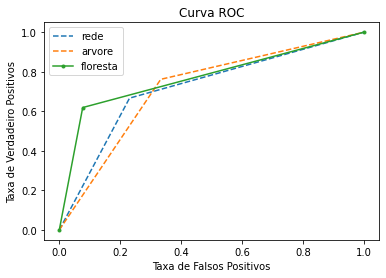

Área sobre a curva - Rede Neural: 0.7179487179487178
Área sobre a curva - Arvore: 0.7142857142857143
Área sobre a curva - Floresta: 0.7710622710622711


In [ ]:
# Plotando gráfico da Curva ROC
fpr_re3, tpr_re3, _ = roc_curve(y3_test,rede3)
fpr_ar3, tpr_ar3, _ = roc_curve(y3_test,arvore3)
fpr_fl3, tpr_fl3, _ = roc_curve(y3_test,floresta3)
plt.plot(fpr_re3,tpr_re3,linestyle='--',label='rede')
plt.plot(fpr_ar3,tpr_ar3,linestyle='--',label='arvore')
plt.plot(fpr_fl3,tpr_fl3,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f"Área sobre a curva - Rede Neural: {roc_auc_score(y3_test,rede3)}")
print(f"Área sobre a curva - Arvore: {roc_auc_score(y3_test,arvore3)}")
print(f"Área sobre a curva - Floresta: {roc_auc_score(y3_test,floresta3)}")

### **Validação cruzada**

In [ ]:
# definindo os modelos


In [ ]:
# calculando os scores
scores_re3 = cross_val_score(rede3_v, X3, y3, cv=5)
scores_ar3 = cross_val_score(arvore3_v, X3, y3, cv=5)
scores_fl3 = cross_val_score(floresta3_v, X3, y3, cv=5)

In [ ]:
# printando scores
print('Rede Neural: ', scores_re3)
print('Arvore: ', scores_ar3)
print('Random Forest: ', scores_fl3)

Rede Neural:  [0.66666667 0.73333333 0.71666667 0.8        0.72881356]
Arvore:  [0.63333333 0.7        0.63333333 0.76666667 0.6440678 ]
Random Forest:  [0.75       0.66666667 0.78333333 0.76666667 0.76271186]


In [ ]:
print('Rede Neural: ', scores_re2.mean(), scores_re2.std())
print('Arvore: ', scores_ar2.mean(), scores_ar2.std())
print('Random Forest: ', scores_fl2.mean(), scores_fl2.std())

Rede Neural:  0.6201079622132253 0.10359503889125339
Arvore:  0.6248313090418354 0.04926607808786332
Random Forest:  0.6937921727395412 0.08971304260283551
